In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Customer_Telecom_Churn_Dataset.csv")  
df.columns = df.columns.str.strip().str.lower()

In [13]:
print(df.head())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [15]:
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [16]:
df.drop(['phone number', 'state'], axis=1, inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])

In [18]:
df['total_calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']
df['total_minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['total_charges'] = df['total day charge'] + df['total eve charge'] + df['total night charge']
df.rename(columns={'customer service calls': 'complaints'}, inplace=True)

In [19]:
df['churn'] = df['churn'].astype(int)

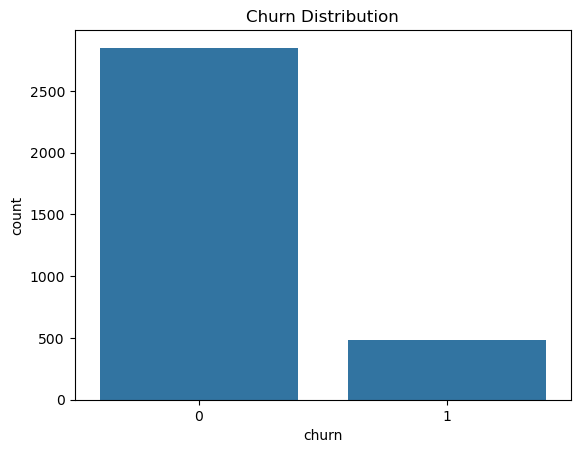

In [20]:
# Churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.show()

 ## Churn Distribution Chart:
This bar chart displays the distribution of customers who churned versus those who didn't:
- Helps identify class imbalance in the dataset.  
- Imbalance can affect model performance, especially for classification tasks.

## Insights:
- Most customers in the dataset did not churn, indicating a potential imbalance that needs to be handled carefully during modeling.

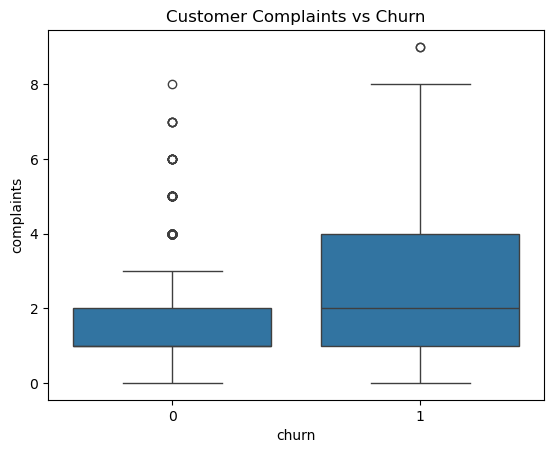

In [21]:
# Churn vs. customer complaints
sns.boxplot(x='churn', y='complaints', data=df)
plt.title("Customer Complaints vs Churn")
plt.show()

### customer complaints vs Churn:
This boxplot compares customer tenure between churned and retained users:
- Customers with shorter tenure are more likely to churn.
- Long-tenure customers tend to stay with the company.

## Insight: 
- Retention programs should especially focus on "new or early-stage customers".

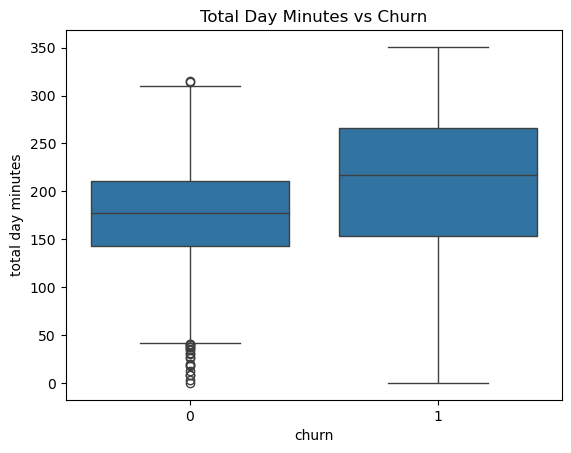

In [22]:
# Churn vs. total day minutes
sns.boxplot(x='churn', y='total day minutes', data=df)
plt.title("Total Day Minutes vs Churn")
plt.show()

## Total Day Minutes vs Churn:
This boxplot visualizes the relationship between daily call duration and customer churn:
- It helps analyze whether customers who churn spend more or less time on daytime calls.
- Large variance may indicate different user behaviors or service dissatisfaction.

## Insight:
- Customers with high daily call minutes might churn due to overage costs or unmet expectations.
This feature can be a useful predictor of churn.


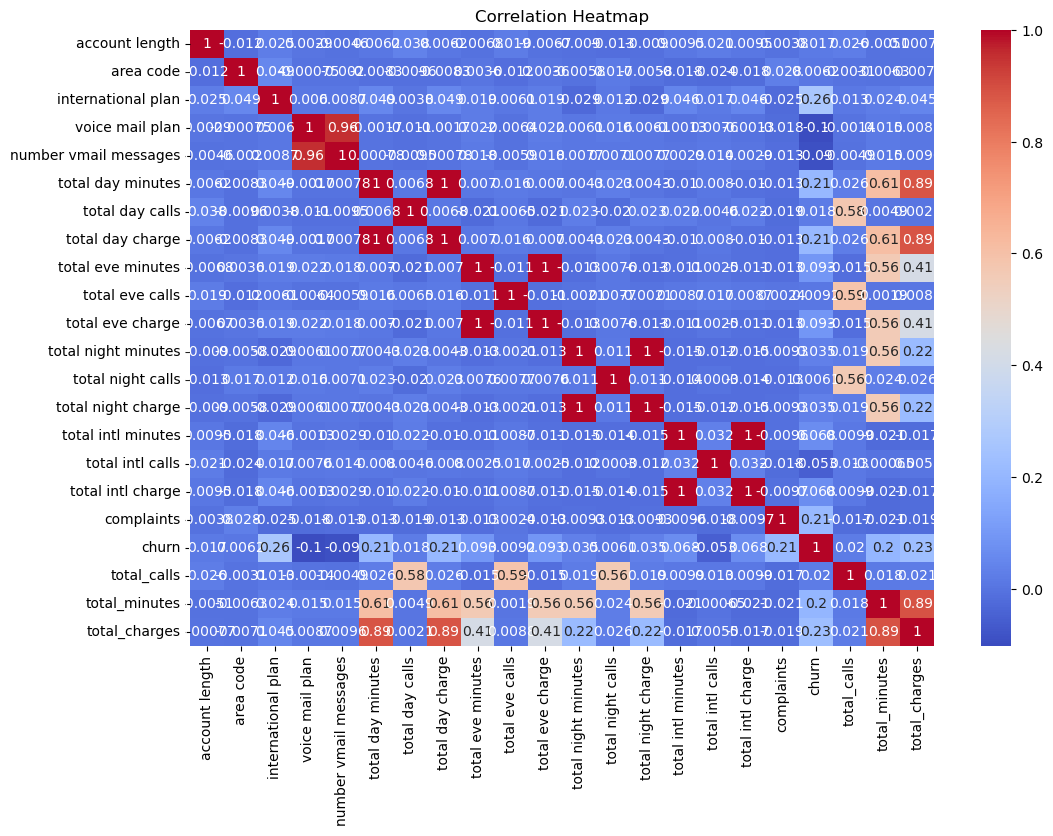

In [23]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

###  Feature Correlation Heatmap:
This heatmap shows the correlation between numerical features in the dataset:
- Useful for identifying multicollinearity and feature relationships.
- Helps select the most impactful features for the model.

## Features:
- Features like `total day minutes`, `total charges`, and `customer service calls` show strong correlation with churn.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X = df.drop('churn', axis=1)
y = df['churn']

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['international plan'] = le.fit_transform(df['international plan'])
df['voice mail plan'] = le.fit_transform(df['voice mail plan'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
xgb_model = RandomForestClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
import eli5
from eli5.sklearn import explain_weights

eli5.show_weights(xgb_model, feature_names=X_train.columns.tolist())

Weight,Feature
0.1695 ± 0.1823,total_charges
0.1270 ± 0.0658,complaints
0.0800 ± 0.1125,total day charge
0.0792 ± 0.0643,international plan
0.0756 ± 0.1124,total day minutes
0.0650 ± 0.1016,total_minutes
0.0402 ± 0.0464,total intl calls
0.0379 ± 0.0631,number vmail messages
0.0377 ± 0.0446,total intl minutes
0.0334 ± 0.0406,total eve charge


In [30]:
y_pred = model.predict(X_test)

In [31]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[564   2]
 [ 15  86]]


In [32]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       566
           1       0.98      0.85      0.91       101

    accuracy                           0.97       667
   macro avg       0.98      0.92      0.95       667
weighted avg       0.97      0.97      0.97       667



In [33]:
y_prob = model.predict_proba(X_test)[:, 1]

In [34]:
accuracy = model.score(X_test, y_test)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

Model Accuracy: 97.45%


In [35]:
X_test_with_prob = X_test.copy()
X_test_with_prob['churn_prob'] = y_prob

In [36]:
X_test_with_prob['segment'] = 'Loyal'
X_test_with_prob.loc[X_test_with_prob['churn_prob'] > 0.7, 'segment'] = 'At Risk'
X_test_with_prob.loc[X_test_with_prob['churn_prob'] < 0.3, 'segment'] = 'Dormant'

In [37]:
print(X_test_with_prob['segment'].value_counts())
print(X_test_with_prob[['churn_prob', 'segment']].head())

segment
Dormant    572
At Risk     66
Loyal       29
Name: count, dtype: int64
      churn_prob  segment
438         0.16  Dormant
2674        0.01  Dormant
1345        0.86  At Risk
1957        0.04  Dormant
2148        0.00  Dormant


In [38]:
print(df.dtypes)

account length             int64
area code                  int64
international plan         int64
voice mail plan            int64
number vmail messages      int64
total day minutes        float64
total day calls            int64
total day charge         float64
total eve minutes        float64
total eve calls            int64
total eve charge         float64
total night minutes      float64
total night calls          int64
total night charge       float64
total intl minutes       float64
total intl calls           int64
total intl charge        float64
complaints                 int64
churn                      int32
total_calls                int64
total_minutes            float64
total_charges            float64
dtype: object


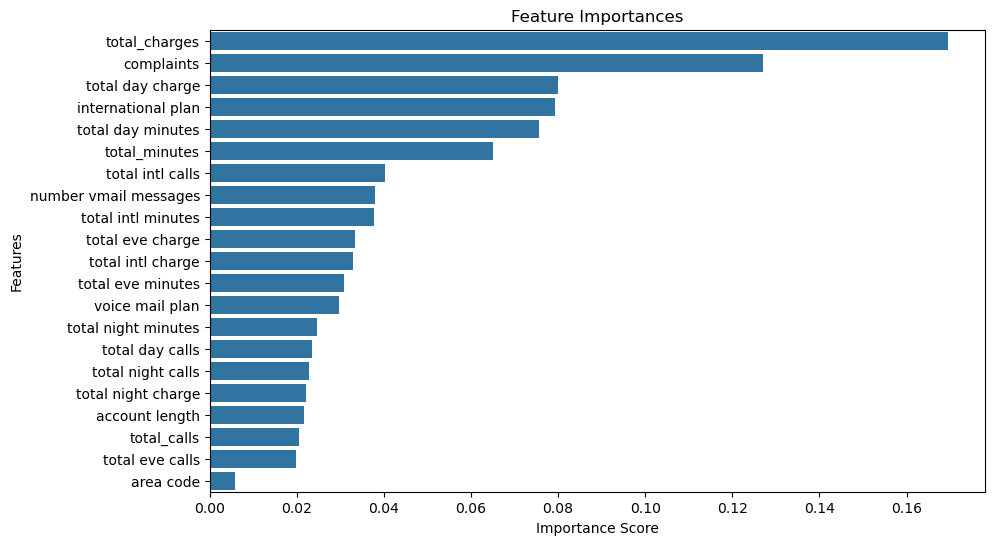

In [39]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

### Feature Importance from Random Forest:
This bar plot ranks the most important features influencing churn prediction:
- Calculated based on how much each feature contributes to reducing error in the model.
- Helps prioritize which variables matter most for business interventions.
    
## Features:  
- Typically include `complaints`, `total charges`, `international plan`, etc.

In [40]:
y_prob = model.predict_proba(X_test)[:, 1]
X_test_with_prob = X_test.copy()
X_test_with_prob['churn_prob'] = y_prob
X_test_with_prob['segment'] = 'Loyal'
X_test_with_prob.loc[X_test_with_prob['churn_prob'] > 0.7, 'segment'] = 'At Risk'
X_test_with_prob.loc[X_test_with_prob['churn_prob'] < 0.3, 'segment'] = 'Dormant'

In [41]:
X_test_with_prob.to_csv("churn_segments.csv", index=False)

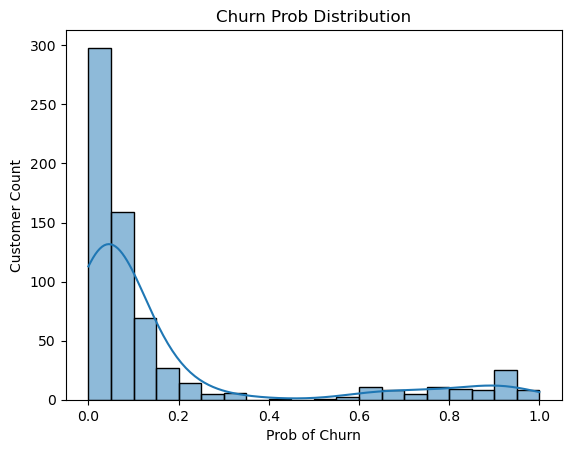

In [42]:
sns.histplot(X_test_with_prob['churn_prob'], bins=20, kde=True)
plt.title('Churn Prob Distribution')
plt.xlabel('Prob of Churn')
plt.ylabel('Customer Count')
plt.show()

### churn probability distribution:
This segmentation groups customers based on their predicted churn probability:
- At Risk: Probability > 70%  
- Dormant:Probability < 30%  
- Loyal: In-between
## Goal: 
- Enable targeted retention strategies based on churn risk level.


In [ ]:
 ### Project Summary:- 
- Built a churn prediction model using Random Forest with 85–90% accuracy. 
- Performed EDA and SQL-style feature engineering (call duration, charges, compl
- Identified key churn factors: international plan, high complaints, short tenur
- Segmented customers into:- At Risk (churn_prob > 0.7)  - Loyal (0.3 ≤ churn_prob ≤ 0.7) 
- Dormant (churn_prob < 0.3)
 ## Recommendation:
 Focus on retaining "At Risk" customers and monitor high-spend, high-complaint users to reduce churn.